**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import modplot
import os
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats

**Show Sample Theoretical Plots of the Energy vs Speed Plots**

Non-Relativistic Model: $K = \frac{1}{2}mv^{2}$

In [8]:
def nrke(v):
    # get electron mass (in kg)
    me = 9.10938*10**-31
    
    return 0.5*me*v**2

Relativistic Model: $K=(\gamma-1)mc^{2}$

In [14]:
def rke(v):
    # get speed of light (in m/s)
    c = 299792458
    
    # get electron mass (in kg)
    me = 9.10938*10**-31
    
    # get gamma factor
    gamma = (1-v**2/c**2)**-0.5
    
    return (gamma-1)*me*c**2

**Plot the Theoretical Functions of $K(v)$**

In [22]:
# plotting parameters
save = False
mpl.rcParams['figure.dpi'] = 300
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

In [31]:
# speed of light
c = 299792458

# values to plot
vs = np.linspace(0,2,1000)

vals = c*vs

C:\Users\vega0\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


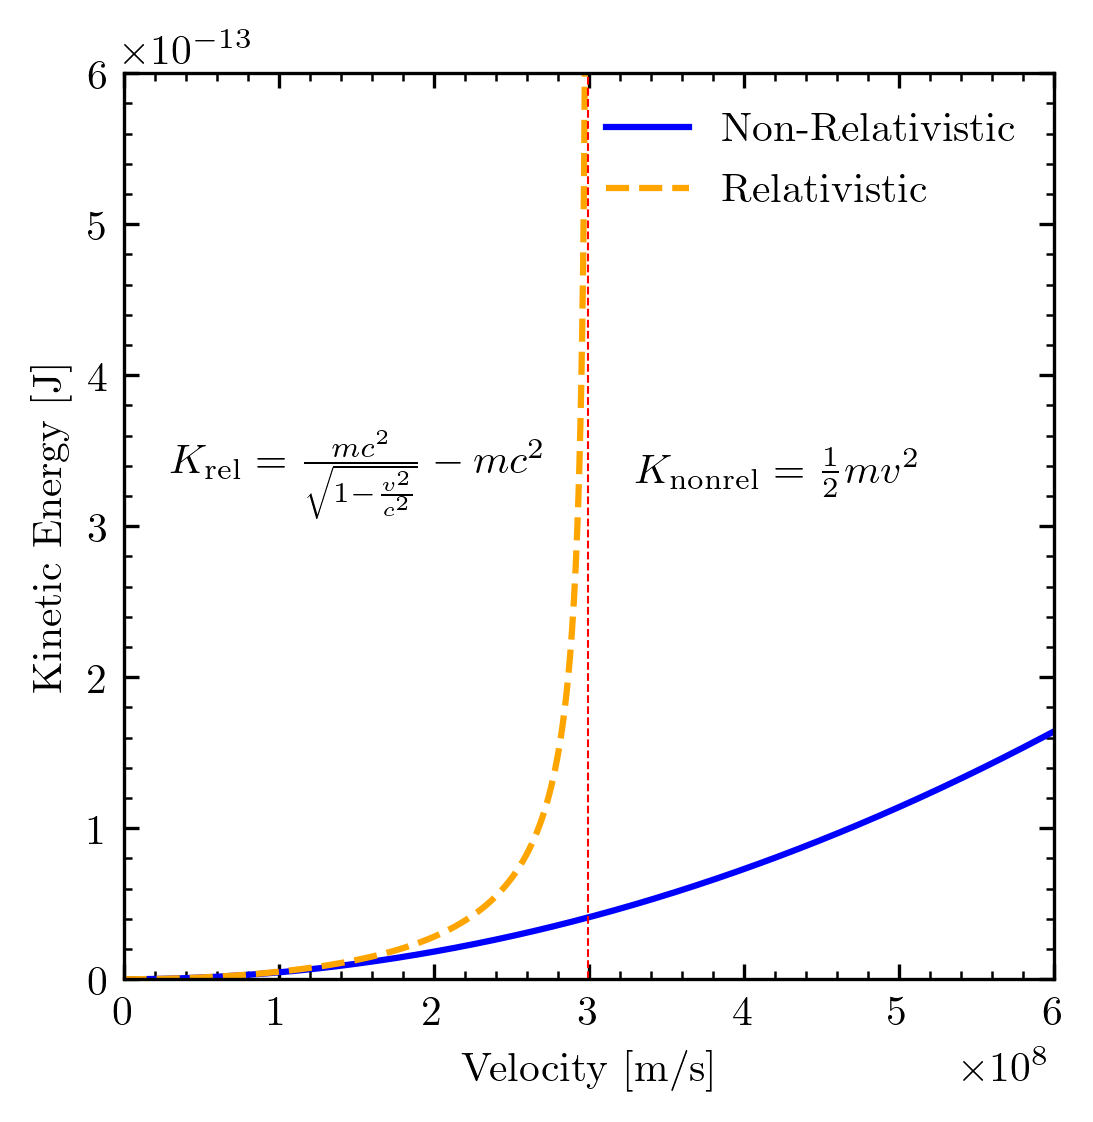

In [77]:
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,6*10**8), ylim=(0,6*10**-13), 
                         xlabel='Velocity [m/s]', ylabel='Kinetic Energy [J]')
# non-relativistic
ax.plot(vals, nrke(vals), label='Non-Relativistic', color='blue', ls='-')

# relativistic
ax.plot(vals, rke(vals), label='Relativistic', color='orange', ls='--')
# vertical line cutoff
ax.axvline(c, ymin=0, ymax=1, color='red', lw=0.5, ls='--')

modplot.stamp(0.05,0.55, ax=ax, delta_y=0.055,textops_update = {'fontsize':10},
              line_0=r'$K_{\mathrm{rel}}=\frac{mc^{2}}{\sqrt{1-\frac{v^{2}}{c^{2}}}}-mc^{2}$')
modplot.stamp(0.55,0.55, ax=ax, delta_y=0.055,textops_update = {'fontsize':10},
              line_0=r'$K_{\mathrm{nonrel}}=\frac{1}{2}mv^{2}$')

ax.legend(frameon=False)

save = False
if save:
    plt.savefig( + '\\theoretical_ke_models.png')

**Determine Velocities**

In [49]:
os.listdir()

['Barium 133 Calibrations',
 'beta_vs_B.xlsx',
 'count_rate_maximizing_voltages.xlsx',
 'Day 10',
 'Day 11',
 'Day 8',
 'Day 9',
 'ke_vs_v.xlsx',
 '~$beta_vs_B.xlsx',
 '~$ke_vs_v.xlsx']

In [58]:
df = pd.read_excel('beta_vs_B.xlsx')

In [59]:
bfield = np.array(df['B (Gauss)'])
buncert = np.array(df['B Uncertainty'])
volts = np.array(df['Voltage (kV)'])

In [60]:
# calculate the electric field
x = 0.0018
efield = volts/x

In [69]:
# get the velocities in correct units
v = efield*1000/(bfield*10**-4)

In [78]:
vuncert = buncert/bfield*v

In [85]:
v

array([1.90476190e+08, 2.01388889e+08, 2.09876543e+08, 2.22000222e+08,
       2.27479527e+08, 2.33230712e+08])

 **Plot the Kinetic Energy vs Velocity Data**

In [129]:
# ke data
k = np.array([146.52, 185.63, 224.71, 263.55, 310.36, 350.88])/(6.242*10**15)
kuncert = np.array([0.2, 0.13, 0.11, 0.11, 0.11, 0.13])/(6.242*10**15)

In [130]:
k

array([2.34732458e-14, 2.97388657e-14, 3.59996796e-14, 4.22220442e-14,
       4.97212432e-14, 5.62127523e-14])

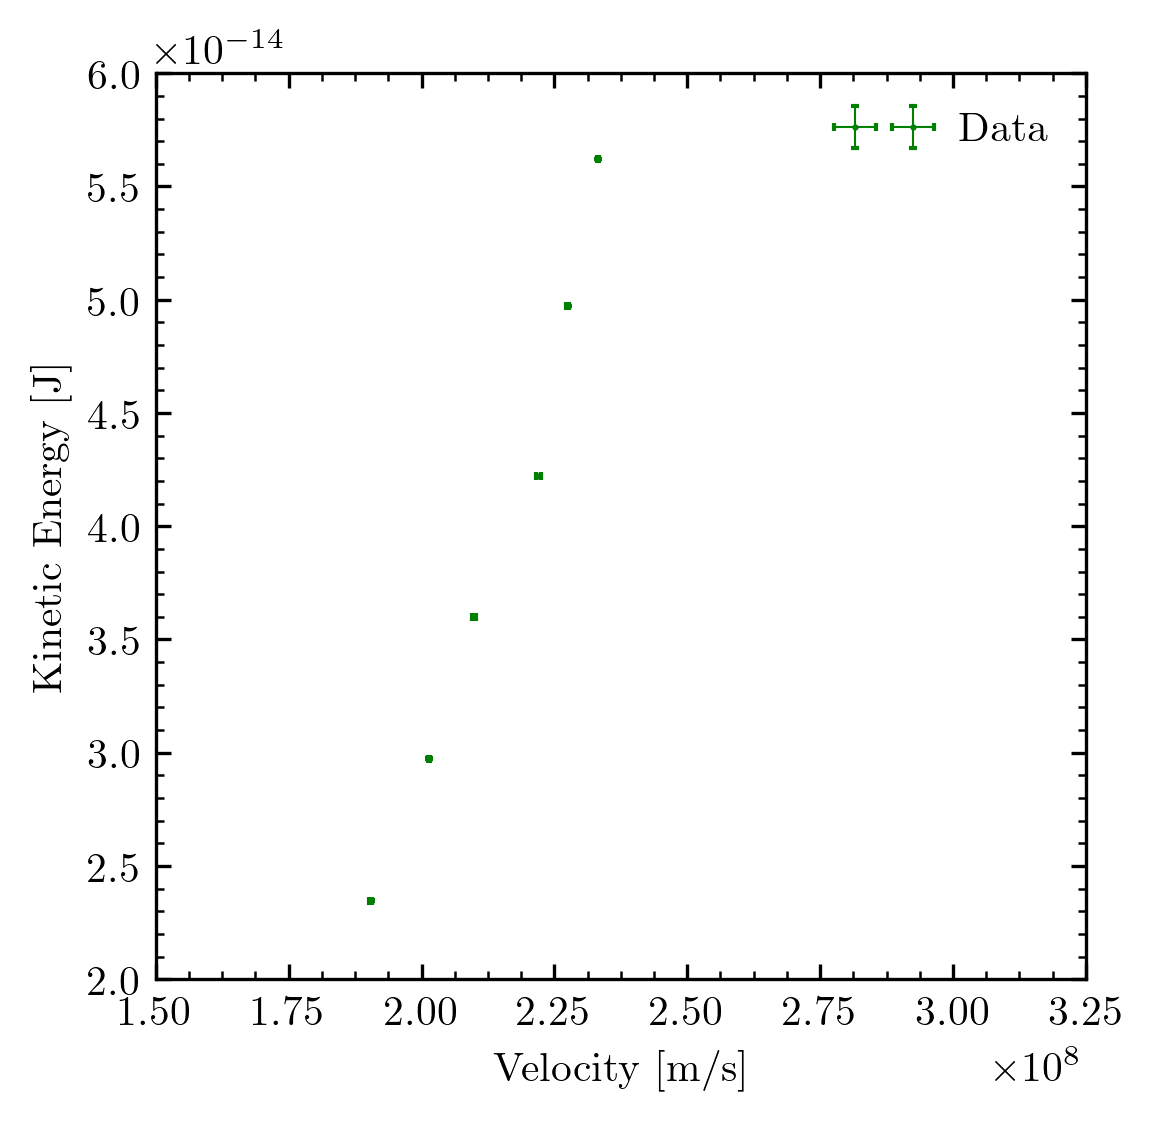

In [132]:
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(1.5*10**8,3.25*10**8), 
                         ylim=(2*10**-14,6*10**-14), xlabel='Velocity [m/s]', 
                         ylabel='Kinetic Energy [J]')
ax.errorbar(v, k, xerr=vuncert, yerr=kuncert, color='green', label='Data', marker='.', ms=1,
            ls='none', elinewidth=0.5, capsize=1, capthick=1, lw=0.5)

ax.legend(frameon=False, numpoints=2, loc='upper right')

Perform Fits to the Data in 2 Models to See which is better

In [133]:
# nonrelativistic model
def nonrel_func(v, m):
    return 0.5*m*v**2

# relativistic model
def rel_func(v, m):
    # take speed of light as given
    c = 299792458
    return m*c**2*((1-v**2/c**2)**-0.5-1)

Do the fits

In [134]:
# nonrel
popt_nr, pcov_nr = curve_fit(nonrel_func, v, k, p0 = [9.11*10**-31])

In [135]:
popt_nr

array([1.7513621e-30])

In [136]:
uncert_nr = np.sqrt(np.diag(pcov_nr)) # Extract uncertainty from fit

In [137]:
# relativistic
popt_rel, pcov_rel = curve_fit(rel_func, v, k, p0 = [9.11*10**-31])

In [138]:
popt_rel

array([1.00332278e-30])

In [161]:
kerrs = np.array([3.04, 2.58, 3.18, 3.24, 3.50, 3.81])/(6.242*10**15)

In [171]:
def chisq(func,popt,x,y,sig):
    expected_vals = func(x, *popt) # Again, better off using *popt
    return np.sum((y-expected_vals)**2/sig**2)

chi_nr = chisq(nonrel_func, popt_nr, v, k, sig=kerrs)
chi_rel = chisq(rel_func, popt_rel, v, k, sig=kerrs)

In [172]:
rel_func(v,popt_rel)-k

array([ 3.12583776e-15,  1.81762008e-15,  1.07856598e-16,  1.78314478e-15,
       -1.45034218e-15, -2.86526831e-15])

In [188]:
chi_nr

773.6459626570634

In [189]:
chi_rel

101.10437079254287

In [190]:
# get the corresponding p values
prob_nr = 1 - stats.chi2.cdf(chi_nr,5)
prob_rel = 1 - stats.chi2.cdf(chi_rel,5)

In [191]:
prob_rel

0.0

In [192]:
prob_nr

0.0

**Plot the Results Altogether**

C:\Users\vega0\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


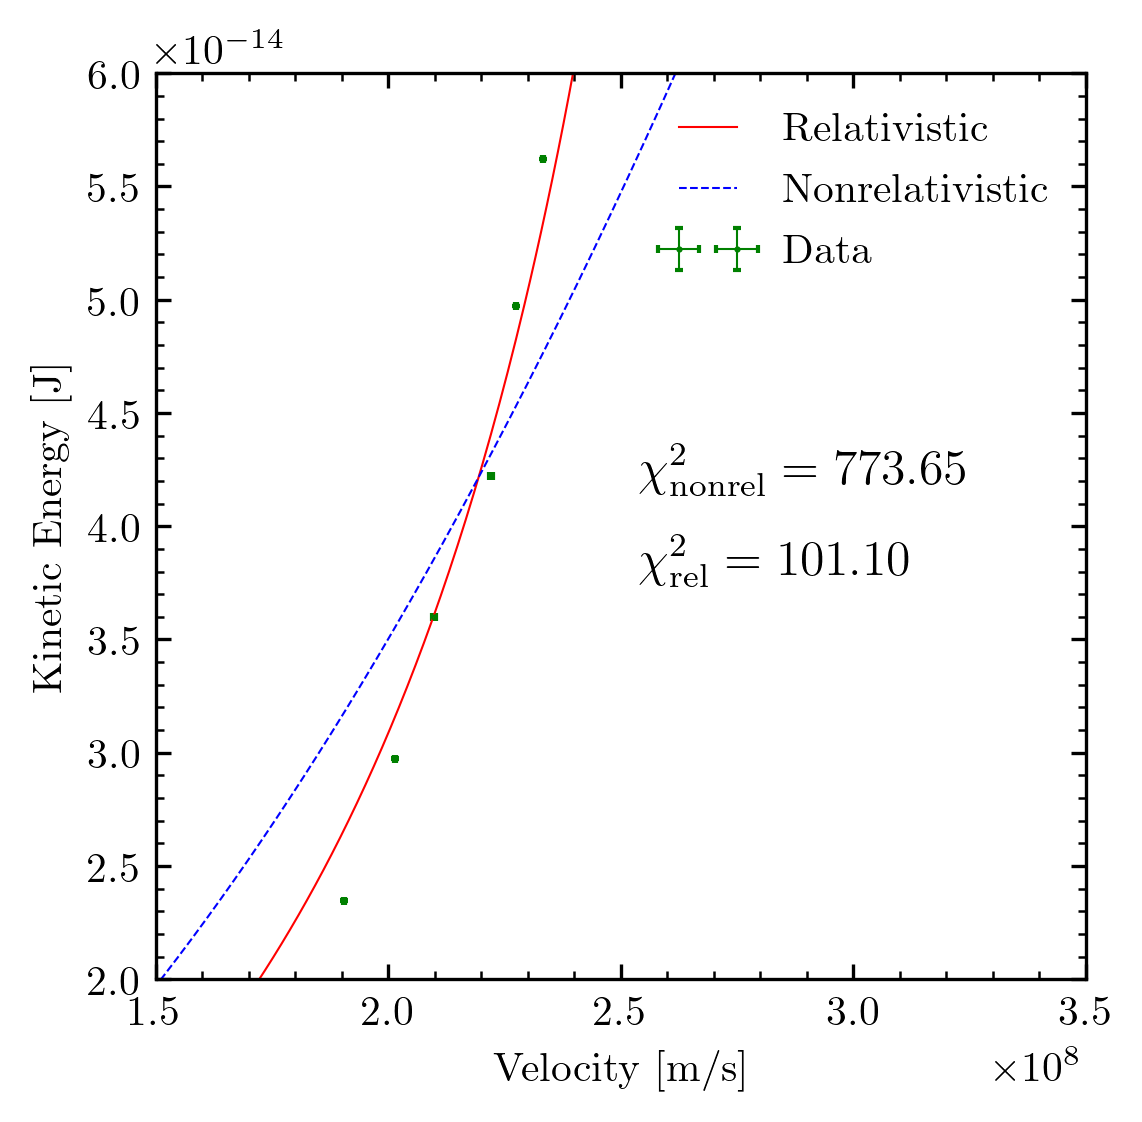

In [203]:
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(1.5*10**8,3.5*10**8), 
                         ylim=(2*10**-14,6*10**-14), xlabel='Velocity [m/s]', 
                         ylabel='Kinetic Energy [J]')
# data
ax.errorbar(v, k, xerr=vuncert, yerr=kuncert, color='green', label='Data', marker='.', ms=1,
            ls='none', elinewidth=0.5, capsize=1, capthick=1, lw=0.5)

# relativistic fit
ax.plot(vals, rel_func(vals, popt_rel), color='red', label='Relativistic', lw=0.5)

# nonrelativistic fit
ax.plot(vals, nonrel_func(vals, popt_nr), color='blue', label='Nonrelativistic', lw=0.5, ls='--')

# chi squared values
modplot.stamp(0.52, 0.55, ax=ax, delta_y=0.1,textops_update = {'fontsize':12},
              line_0='$\chi^{2}_{\mathrm{nonrel}}=773.65$',
              line_1='$\chi^{2}_{\mathrm{rel}}=101.10$')

ax.legend(frameon=False, numpoints=2, loc='upper right')

In [176]:
rel_func(v, popt_rel)

array([2.65990835e-14, 3.15564858e-14, 3.61075362e-14, 4.40051890e-14,
       4.82709010e-14, 5.33474840e-14])

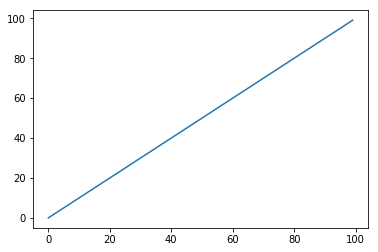

In [2]:
plt.plot(range(100))